In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
MumbaiTrain=pd.read_csv(r"E:\project\python\dataset\Mumbai Urban Train Dataset.csv",encoding='latin-1')

In [3]:
MumbaiTrain.head()

,Station,Station Code,Line,Distance From Previous of the Line,Time taken From Previous of the Line,About,Platforms,Tracks,Year of Opening
0,Churchgate,CCG,Western,0 KM,0 min,The Fort area built by the British had three m...,4.0,4.0,1867.0
1,Marine Lines,MEL,Western,1 KM,3 min,Marine Lines (station code: MEL) is a railway ...,4.0,4.0,1867.0
2,Charni Road,CYR,Western,1 KM,2 min,"Charni Road (formerly Churney Road, station co...",4.0,4.0,1867.0
3,Grant Road,GTR,Western,1 KM,3 min,"Grant Road (/gra?nt/; station code: GTR), form...",4.0,4.0,1868.0
4,Mumbai Central,MMCT,Western,1 KM,2 min,"Mumbai Central (formerly Bombay Central, stati...",9.0,9.0,1930.0


In [4]:
MumbaiTrain.isnull().sum()

Station                                  0
Station Code                             0
Line                                     0
Distance From Previous of the Line       0
Time taken From Previous of the Line     0
About                                    0
Platforms                                5
Tracks                                   9
Year of Opening                         14
dtype: int64

There are null vaules present in Platforms , Tracks and Year of Opening

In [5]:
MumbaiTrain.dropna(inplace=True)

In [6]:
MumbaiTrain.isnull().sum()

Station                                 0
Station Code                            0
Line                                    0
Distance From Previous of the Line      0
Time taken From Previous of the Line    0
About                                   0
Platforms                               0
Tracks                                  0
Year of Opening                         0
dtype: int64

We removed the all the null values from Platforms ,Tracks and Year of Opening 

In [7]:
MumbaiTrain.columns

Index(['Station', 'Station Code', 'Line', 'Distance From Previous of the Line',
       'Time taken From Previous of the Line', 'About', 'Platforms', 'Tracks',
       'Year of Opening '],
      dtype='object')

There is extra space present in 'year of opening ' column

In [8]:
MumbaiTrain=MumbaiTrain.rename(columns={"Year of Opening ":"Year of Opening"})

In [9]:
MumbaiTrain.columns

Index(['Station', 'Station Code', 'Line', 'Distance From Previous of the Line',
       'Time taken From Previous of the Line', 'About', 'Platforms', 'Tracks',
       'Year of Opening'],
      dtype='object')

In [10]:
MumbaiTrain.dtypes

Station                                  object
Station Code                             object
Line                                     object
Distance From Previous of the Line       object
Time taken From Previous of the Line     object
About                                    object
Platforms                               float64
Tracks                                  float64
Year of Opening                         float64
dtype: object

We change the datatype of 'Platforms','Tracks' and 'Year of Opening' into INT datatype

In [11]:
MumbaiTrain[['Platforms','Tracks','Year of Opening']]=MumbaiTrain[['Platforms','Tracks','Year of Opening']].astype(int)

In [12]:
MumbaiTrain.dtypes

Station                                 object
Station Code                            object
Line                                    object
Distance From Previous of the Line      object
Time taken From Previous of the Line    object
About                                   object
Platforms                                int32
Tracks                                   int32
Year of Opening                          int32
dtype: object

we change the datatype of 'Distance From Previous of the Line' and 'Time taken From Previous of the Line' into INT for our further visualization and also changing the name

In [13]:
MumbaiTrain['Time taken From Previous of the Line']=MumbaiTrain['Time taken From Previous of the Line'].str.replace(" min", "").astype(int)

In [14]:
MumbaiTrain['Distance From Previous of the Line']=MumbaiTrain['Distance From Previous of the Line'].str.replace(" KM", "").astype(int)

In [15]:
MumbaiTrain.rename(columns={"Time taken From Previous of the Line":"Time taken From Previous of the Line(min)","Distance From Previous of the Line":'Distance From Previous of the Line(KM)'},inplace=True)

In [16]:
MumbaiTrain.head(3)

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
0,Churchgate,CCG,Western,0,0,The Fort area built by the British had three m...,4,4,1867
1,Marine Lines,MEL,Western,1,3,Marine Lines (station code: MEL) is a railway ...,4,4,1867
2,Charni Road,CYR,Western,1,2,"Charni Road (formerly Churney Road, station co...",4,4,1867


In [17]:
df1=MumbaiTrain.drop(columns=["Station",'Station Code' ,'Line',"About"],axis=1)

We remove the string columns for heatmap visualization

In [18]:
df1.head(2)

,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),Platforms,Tracks,Year of Opening
0,0,0,4,4,1867
1,1,3,4,4,1867


Data Cleaning process is complete

## Data visualization

In [20]:
MumbaiTrain.head(3)

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
0,Churchgate,CCG,Western,0,0,The Fort area built by the British had three m...,4,4,1867
1,Marine Lines,MEL,Western,1,3,Marine Lines (station code: MEL) is a railway ...,4,4,1867
2,Charni Road,CYR,Western,1,2,"Charni Road (formerly Churney Road, station co...",4,4,1867


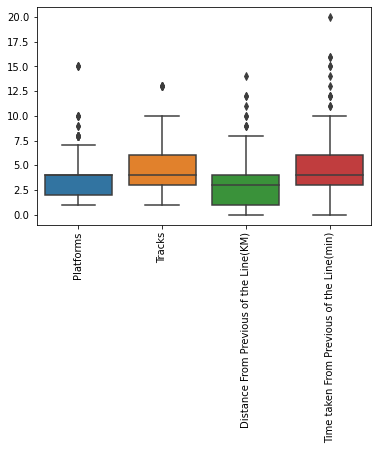

In [21]:
outliers=sns.boxplot(data=MumbaiTrain[['Platforms',"Tracks","Distance From Previous of the Line(KM)","Time taken From Previous of the Line(min)"]])
outliers.set_xticklabels(outliers.get_xticklabels(),rotation=90)
plt.show()

There are outliers present in the data but we are not removing as specific year of track opening as well as platform opening is also important. For Ex : 10 Tracks open in 1962 .

In [22]:
lineGroupBy=MumbaiTrain.groupby("Line")

In [23]:
lineGroupBy.head(1)

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
0,Churchgate,CCG,Western,0,0,The Fort area built by the British had three m...,4,4,1867
37,CSMT,CSMT/ST,Central 1,0,0,Chhatrapati Shivaji Terminus (officially Chhat...,7,7,1878
77,CSMT,CSMT/ST,Central 2,0,0,Chhatrapati Shivaji Terminus (officially Chhat...,7,7,1878
114,CSMT,CSMT/ST,Harbour,0,0,Chhatrapati Shivaji Terminus (officially Chhat...,7,7,1878
139,Thane,TNA,Trans Harbour,0,0,"Thane (formerly Thana, station code: TNA) is a...",10,10,1853
153,Nerul,NEU,Uran,0,0,Nerul is a railway station on the Harbour Line...,6,6,1993
158,Diva Jn,DIVA,Diva-Roha,0,0,Diva Junction railway station is a junction be...,8,13,1877
175,Dahanu Road,DRD,Dahanu-Virar-Panvel,0,0,Dahanu Road is a railway station near the town...,5,6,1898
197,Neral,NRL,Neral-Matheran,0,0,Neral Junction is a railway station on the Cen...,2,2,1887


In [24]:
lineGroupBy.size().reset_index()

,Line,0
0,Central 1,39
1,Central 2,34
2,Dahanu-Virar-Panvel,17
3,Diva-Roha,14
4,Harbour,25
5,Neral-Matheran,1
6,Trans Harbour,14
7,Uran,5
8,Western,36


 1.We groupby the data on "Line" columns.
 
 2.we will select single line to perform visualization.

# Analysing the Central 1 Line

In [25]:
p1=lineGroupBy.get_group("Central 1")

In [26]:
p1.head(2)

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
37,CSMT,CSMT/ST,Central 1,0,0,Chhatrapati Shivaji Terminus (officially Chhat...,7,7,1878
38,Masjid,MSD,Central 1,1,3,Masjid (station code: MSD) is a railway statio...,4,6,1877


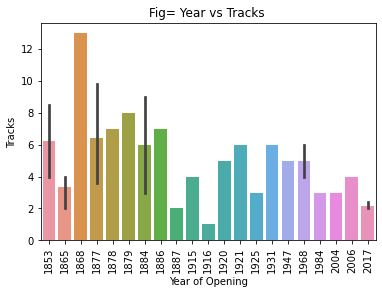

In [27]:
p1a=sns.barplot(x="Year of Opening",y="Tracks",data=p1)
p1a.set_xticklabels(p1a.get_xticklabels(),rotation=90)
plt.title("Fig= Year vs Tracks ")
plt.show()

In [28]:
p1['Tracks'].mean()

4.666666666666667

In year 1916 only 1 track was opened but previously in 1868 it was more than 12 tracks

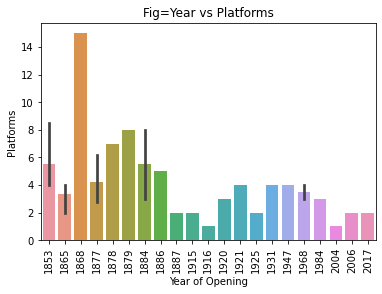

In [29]:
p1b=sns.barplot(x="Year of Opening",y="Platforms",data=p1)
p1b.set_xticklabels(p1b.get_xticklabels(),rotation=90)
plt.title("Fig=Year vs Platforms")
plt.show()

In [30]:
p1['Platforms'].mean()

3.8205128205128207

In year 1916 only 1 track was opened but previously in 1868 it was more than 12 tracks

<AxesSubplot:ylabel='Count'>

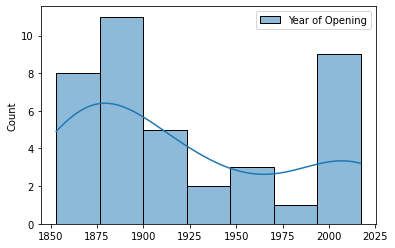

In [31]:
sns.histplot(p1[["Year of Opening"]],kde=True)

Development growth is satisfactory 

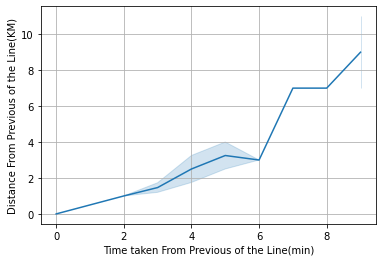

In [32]:
sns.lineplot(x="Time taken From Previous of the Line(min)",y="Distance From Previous of the Line(KM)",data=p1,)
plt.grid()
plt.show()

speed of train is varying and the congestion is medium btw two station

# Analysing the Central 2 Line

In [33]:
p2=lineGroupBy.get_group("Central 2")

In [34]:
p2.head(2)

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
77,CSMT,CSMT/ST,Central 2,0,0,Chhatrapati Shivaji Terminus (officially Chhat...,7,7,1878
78,Masjid,MSD,Central 2,1,3,Masjid (station code: MSD) is a railway statio...,4,6,1877


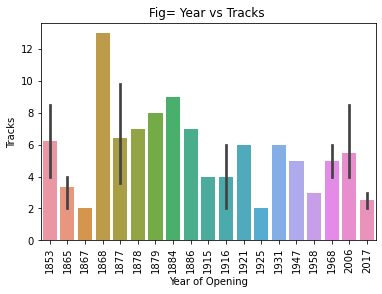

In [35]:
p2a=sns.barplot(x="Year of Opening",y="Tracks",data=p2,)
p2a.set_xticklabels(p2a.get_xticklabels(),rotation=90)
plt.title("Fig= Year vs Tracks ")
plt.show()

In [36]:
p2['Tracks'].mean()

5.411764705882353

In year 1867 and 1925 only 2 tracks was opened but previously in 1868 it was more than 12 tracks

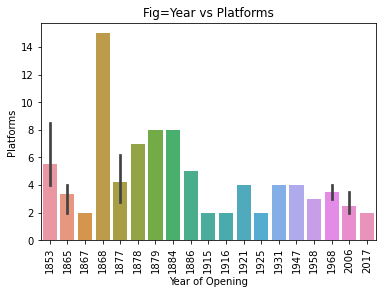

In [37]:
p2b=sns.barplot(x="Year of Opening",y="Platforms",data=p2)
p2b.set_xticklabels(p2b.get_xticklabels(),rotation=90)
plt.title("Fig=Year vs Platforms")
plt.show()

In [38]:
p2['Platforms'].mean()

4.176470588235294

In year 1867,1915,1916,1925and 2017 only 2 platforms was opened but previously in 1868 it was more than 14 platforms

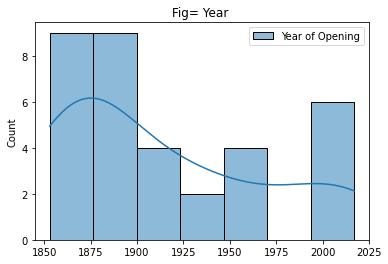

In [39]:
sns.histplot(p2[["Year of Opening"]],kde=True)
plt.title("Fig= Year ")
plt.show()

Devlopment was rapid in starting years of 1850's but there was a consicutive downfall between 1970-1990. After 1990's there was slight growth.

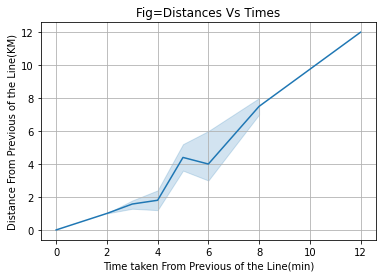

In [40]:
sns.lineplot(x="Time taken From Previous of the Line(min)",y="Distance From Previous of the Line(KM)",data=p2,)
plt.title("Fig=Distances Vs Times")
plt.grid()
plt.show()

speed of train is varying  and the congestion is medium btw two station

# Analysing the Dahanu-Virar-Panvel line

In [41]:
p3=lineGroupBy.get_group("Dahanu-Virar-Panvel")

In [42]:
p3.head()

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
175,Dahanu Road,DRD,Dahanu-Virar-Panvel,0,0,Dahanu Road is a railway station near the town...,5,6,1898
176,Vangaon,VGN,Dahanu-Virar-Panvel,9,9,Vangaon is a railway station on the Western li...,3,4,2012
177,Boisar,BOR,Dahanu-Virar-Panvel,6,6,Boisar railway station is a railway station on...,3,5,1992
179,Palghar,PLG,Dahanu-Virar-Panvel,8,15,Palghar railway station (station code: PLG) is...,3,5,1893
181,Saphale,SAH,Dahanu-Virar-Panvel,8,8,Saphale railway station is a railway station a...,2,3,1894


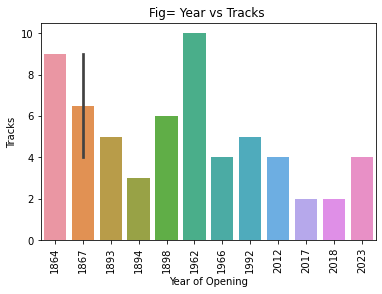

In [43]:
p3a=sns.barplot(x="Year of Opening",y="Tracks",data=p3)
p3a.set_xticklabels(p3a.get_xticklabels(),rotation=90)
plt.title("Fig= Year vs Tracks ")
plt.show()

In [44]:
p3['Tracks'].mean()

4.764705882352941

In year 2017 and 2018 only 1 tracks was opened but previously in 1962 it was 10 tracks

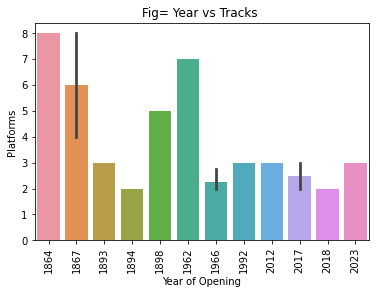

In [45]:
p3b=sns.barplot(x="Year of Opening",y="Platforms",data=p3)
p3b.set_xticklabels(p3b.get_xticklabels(),rotation=90)
plt.title("Fig= Year vs Tracks ")
plt.show()

In [46]:
p3['Platforms'].mean()

3.6470588235294117

In year 1893 and 2018 only 1 platforms was opened but previously in 1864 it was 8 platforms

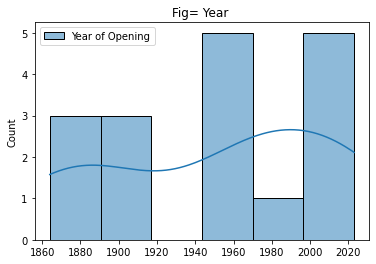

In [47]:
sns.histplot(p3[["Year of Opening"]],kde=True)
plt.title("Fig= Year ")
plt.show()

Devlopment was slow in starting years of 1860's but there was a consicutive downfall between 1915-1950. After 1950's there was slight growth.

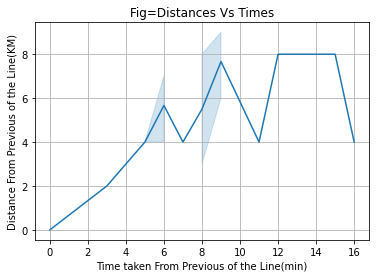

In [48]:
sns.lineplot(x="Time taken From Previous of the Line(min)",y="Distance From Previous of the Line(KM)",data=p3,)
plt.title("Fig=Distances Vs Times")
plt.grid()
plt.show()

speed of train is varying (slow) and the congestion is high btw two station

# Analysing the Diva-Roha Line

In [49]:
p4=lineGroupBy.get_group("Diva-Roha")

In [50]:
p4.head(2)

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
158,Diva Jn,DIVA,Diva-Roha,0,0,Diva Junction railway station is a junction be...,8,13,1877
159,Dativali,DTVL,Diva-Roha,2,5,Dativali is a railway station on the Vasai Roa...,3,2,2017


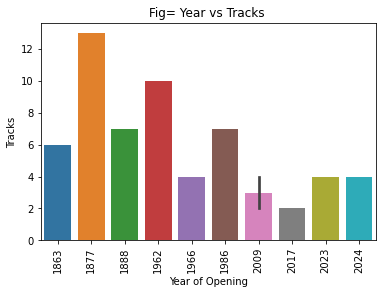

In [51]:
p4a=sns.barplot(x="Year of Opening",y="Tracks",data=p4)
p4a.set_xticklabels(p4a.get_xticklabels(),rotation=90)
plt.title("Fig= Year vs Tracks ")
plt.show()

In [52]:
p4['Tracks'].mean()

5.357142857142857

In year 2017 only 2 track was opened but previously in 1877 it was more than 12 tracks

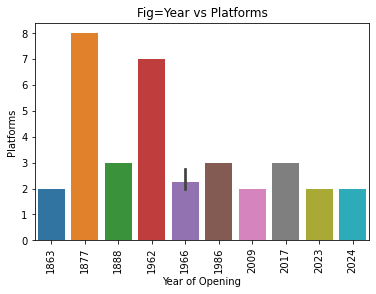

In [53]:
p4b=sns.barplot(x="Year of Opening",y="Platforms",data=p4)
p4b.set_xticklabels(p4b.get_xticklabels(),rotation=90)
plt.title("Fig=Year vs Platforms")
plt.show()

In [54]:
p4['Platforms'].mean()

3.0714285714285716

In year 1863,2009,2023 and 2024 only 1 platform was opened but previously in 1877 it was 8 platforms

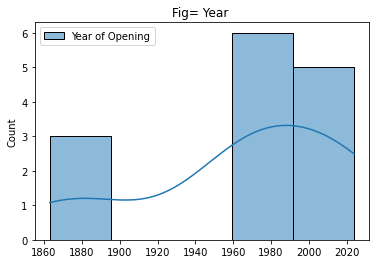

In [55]:
sns.histplot(p4[["Year of Opening"]],kde=True)
plt.title("Fig= Year ")
plt.show()

Devlopment was slow in starting years of 1860's but there was a consicutive downfall between 1890-1960. After 1960's there was slight growth.

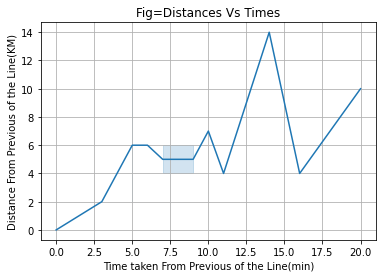

In [56]:
sns.lineplot(x="Time taken From Previous of the Line(min)",y="Distance From Previous of the Line(KM)",data=p4,)
plt.title("Fig=Distances Vs Times")
plt.grid()
plt.show()

speed of train is varying (slow) and the congestion is high btw two station

# Analysing the Harbour  Line

In [57]:
p5=lineGroupBy.get_group("Harbour")

In [58]:
p5.head(2)

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
114,CSMT,CSMT/ST,Harbour,0,0,Chhatrapati Shivaji Terminus (officially Chhat...,7,7,1878
115,Masjid,MSD,Harbour,1,3,Masjid (station code: MSD) is a railway statio...,4,6,1877


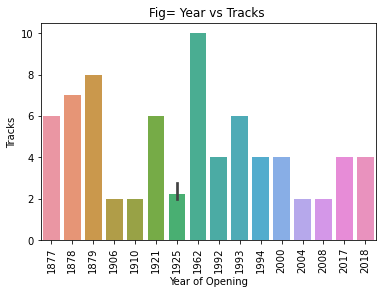

In [59]:
p5a=sns.barplot(x="Year of Opening",y="Tracks",data=p5)
p5a.set_xticklabels(p5a.get_xticklabels(),rotation=90)
plt.title("Fig= Year vs Tracks ")
plt.show()

In [60]:
p5['Tracks'].mean()

3.8

In year 1906,1910,2004 and 2008 only 2 platform was opened but previously in 1962 it was 10 platforms

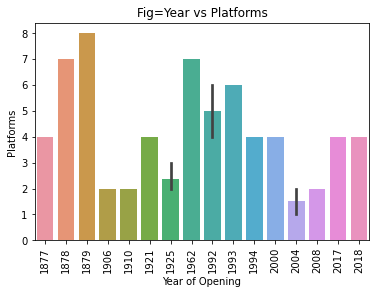

In [61]:
p5b=sns.barplot(x="Year of Opening",y="Platforms",data=p5)
p5b.set_xticklabels(p5b.get_xticklabels(),rotation=90)
plt.title("Fig=Year vs Platforms")
plt.show()

In [62]:
p5['Platforms'].mean()

3.6

In year 2004 only 2 platform was opened but previously in 1879 it was 8 platforms

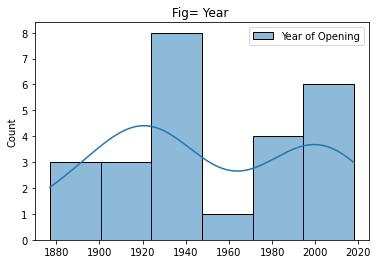

In [63]:
sns.histplot(p5[["Year of Opening"]],kde=True)
plt.title("Fig= Year ")
plt.show()

Development growth is satisfactory 

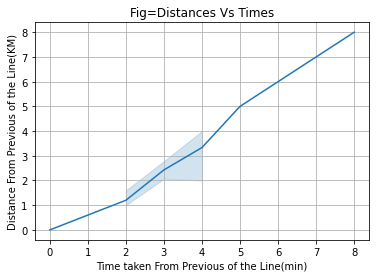

In [64]:
sns.lineplot(x="Time taken From Previous of the Line(min)",y="Distance From Previous of the Line(KM)",data=p5,)
plt.title("Fig=Distances Vs Times")
plt.grid()
plt.show()

speed of train is varying and the congestion is low btw two station

# Analysing the Neral-Matheran Line

In [65]:
p6=lineGroupBy.get_group("Neral-Matheran")

In [66]:
p6.head(8)

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
197,Neral,NRL,Neral-Matheran,0,0,Neral Junction is a railway station on the Cen...,2,2,1887


# Analysing the Trans Harbour Line|

In [68]:
p7=lineGroupBy.get_group("Trans Harbour")

In [69]:
p7.head()

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
139,Thane,TNA,Trans Harbour,0,0,"Thane (formerly Thana, station code: TNA) is a...",10,10,1853
140,Airoli,AIRL,Trans Harbour,8,8,Airoli is a railway station on the Harbour lin...,2,2,2004
141,Rabale,RABE,Trans Harbour,3,3,Rabale is a railway station on the Harbour lin...,2,2,2007
142,Ghansoli,GNSL,Trans Harbour,3,3,Ghansoli is a railway station on the Harbour l...,2,2,2000
143,Koparkhairane,KPHN,Trans Harbour,3,3,Koparkhairane is a railway station[1][2] (KPHN...,2,2,2004


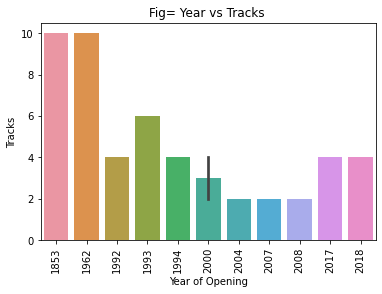

In [70]:
p7a=sns.barplot(x="Year of Opening",y="Tracks",data=p7)
p7a.set_xticklabels(p7a.get_xticklabels(),rotation=90)
plt.title("Fig= Year vs Tracks ")
plt.show()

In [71]:
p7['Tracks'].mean()

4.142857142857143

In year 2004,2007 and 2008 only 2 track was opened but previously in 1853 and 1962 it was 10 tracks

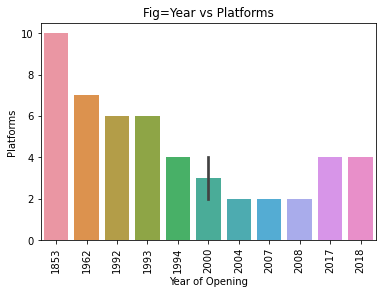

In [72]:
p7b=sns.barplot(x="Year of Opening",y="Platforms",data=p7)
p7b.set_xticklabels(p7b.get_xticklabels(),rotation=90)
plt.title("Fig=Year vs Platforms")
plt.show()

In [73]:
p7['Platforms'].mean()

4.071428571428571

In year 2004,2007 and 2008 only 4 platform was opened but previously in 1853 it was 10 platforms

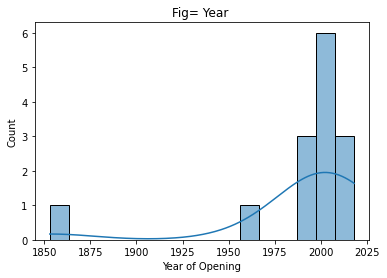

In [74]:
sns.histplot(p7["Year of Opening"],kde=True)
plt.title("Fig= Year ")
plt.show()

Trans Harbour was neglected by the authority and devleopment take place very late

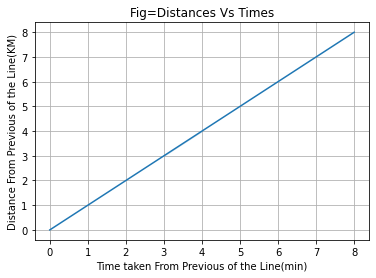

In [75]:
sns.lineplot(x="Time taken From Previous of the Line(min)",y="Distance From Previous of the Line(KM)",data=p7,)
plt.title("Fig=Distances Vs Times")
plt.grid()
plt.show()

speed of train is constant and the congestion is zero btw two station

# Analysing the Uran  Line

In [76]:
p8=lineGroupBy.get_group("Uran")

In [77]:
p8.head(3)

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
153,Nerul,NEU,Uran,0,0,Nerul is a railway station on the Harbour Line...,6,6,1993
154,Seawood Darave,SWDV,Uran,3,3,SeawoodsDarave or simply Seawoods is a newly ...,4,4,2018
155,Belapur CBD,BEPR,Uran,4,4,CBD Belapur is a railway station on the Harbou...,4,4,1994


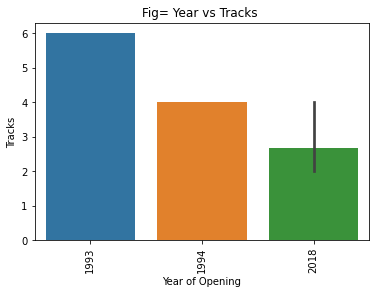

In [78]:
p8a=sns.barplot(x="Year of Opening",y="Tracks",data=p8)
p8a.set_xticklabels(p8a.get_xticklabels(),rotation=90)
plt.title("Fig= Year vs Tracks ")
plt.show()

In [79]:
p8['Tracks'].mean()

3.6

In year 2018 only more than 2 track was opened but previously in 1993 it was 6 tracks

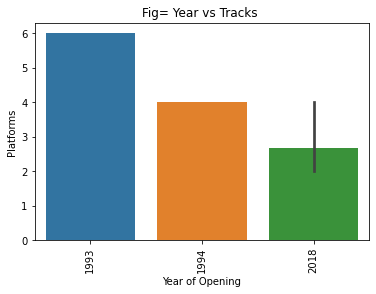

In [80]:
p8b=sns.barplot(x="Year of Opening",y="Platforms",data=p8)
p8b.set_xticklabels(p8b.get_xticklabels(),rotation=90)
plt.title("Fig= Year vs Tracks ")
plt.show()

In [81]:
p8['Platforms'].mean()

3.6

In year 2018 only 3 platform was opened but previously in 1993 it was 6 platforms

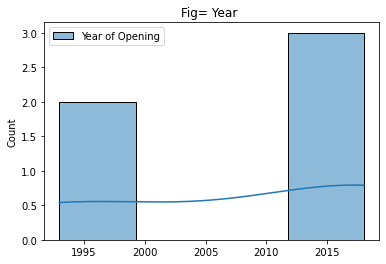

In [82]:
sns.histplot(p8[["Year of Opening"]],kde=True)
plt.title("Fig= Year ")
plt.show()

Devlopment was slow in starting years of 1990's but there was a consicutive downfall between 1990-2010. After 2020's there was slight growth. 

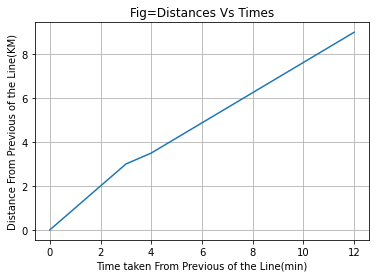

In [83]:
sns.lineplot(x="Time taken From Previous of the Line(min)",y="Distance From Previous of the Line(KM)",data=p8,)
plt.title("Fig=Distances Vs Times")
plt.grid()
plt.show()

speed of train is varying and the congestion is medium

# Analysing the Western Line

In [84]:
p9=lineGroupBy.get_group("Western")

In [85]:
p9.head()

,Station,Station Code,Line,Distance From Previous of the Line(KM),Time taken From Previous of the Line(min),About,Platforms,Tracks,Year of Opening
0,Churchgate,CCG,Western,0,0,The Fort area built by the British had three m...,4,4,1867
1,Marine Lines,MEL,Western,1,3,Marine Lines (station code: MEL) is a railway ...,4,4,1867
2,Charni Road,CYR,Western,1,2,"Charni Road (formerly Churney Road, station co...",4,4,1867
3,Grant Road,GTR,Western,1,3,"Grant Road (/gra?nt/; station code: GTR), form...",4,4,1868
4,Mumbai Central,MMCT,Western,1,2,"Mumbai Central (formerly Bombay Central, stati...",9,9,1930


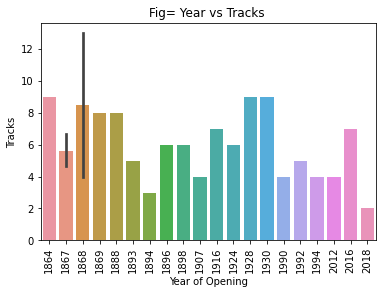

In [86]:
p9a=sns.barplot(x="Year of Opening",y="Tracks",data=p9)
p9a.set_xticklabels(p9a.get_xticklabels(),rotation=90)
plt.title("Fig= Year vs Tracks ")
plt.show()

In [87]:
p9['Tracks'].mean()

5.833333333333333

In year 2018 only 1 track was opened but previously in 1864,1928,1930 it was more than 8 tracks

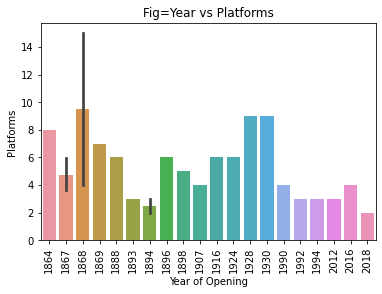

In [88]:
p9b=sns.barplot(x="Year of Opening",y="Platforms",data=p9)
p9b.set_xticklabels(p9b.get_xticklabels(),rotation=90)
plt.title("Fig=Year vs Platforms")
plt.show()

In [89]:
p9['Platforms'].mean()

5.083333333333333

In year 2018 only 1 platform was opened but previously in 1868 it was more than 8 platforms

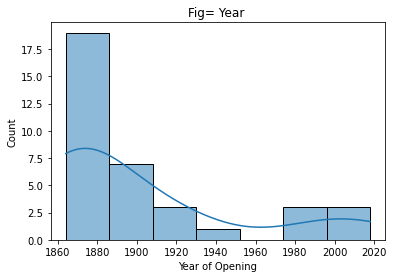

In [90]:
sns.histplot(p9["Year of Opening"],kde=True)
plt.title("Fig= Year ")
plt.show()

Devlopment was rapid in starting years of 1860's but there was a consicutive downfall between 1950-1970. After 1970's there was slight growth.

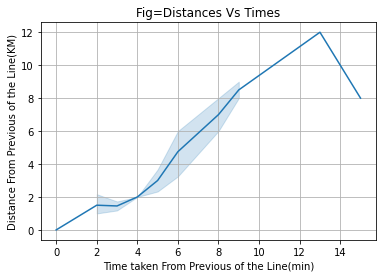

In [91]:
sns.lineplot(x="Time taken From Previous of the Line(min)",y="Distance From Previous of the Line(KM)",data=p9,)
plt.title("Fig=Distances Vs Times")
plt.grid()
plt.show()

speed of train is varying and the congestion is medium between two station

# Conclusion

Central 1 and Harbour are most busiest line.

some lines are not well growth there may be possible reasons:
       
       1-people consumption is low
        
        2-Lack of infrastructure
        
        3-Lack of budget allocation
       
       4-Connectivity of lines are not presents